# 1. Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# 2. Load Data

In [2]:
df = pd.read_csv('Data/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Q1. Do smokers have higher insurance charges than non-smokers?

## 1. State your Null Hypothesis and Alternative Hypothesis

**Null Hypothesis**: There is no difference in the insurance charges between smokers and non-smokers.

**Alternative Hypothesis**: There is a difference in the insurance charges between smokers and non-smokers. 


## 2. Select the correct test according to the data type and number of samples

In [4]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

**Test Type**: 2-sample Independent T-Test

- T-Test because it is numerical
- Independent because different participants are in each group (smokers vs non-smokers)
- Number of samples > 15 for each group



## 3. Test the assumptions of your selected test.

Independent T-Test Assumptions:

- No significant outliers
- Normality 
- Equal Variance 

In [5]:
smoker_insurance = df.loc[df['smoker']=='yes',"charges"]
nonsmoker_insurance = df.loc[ df['smoker']=='no',"charges"]
## Print the average charges for each group
print(f"For Smoker (n={len(smoker_insurance)}): Mean={np.mean(smoker_insurance):.2f}")
print(f"For Non-Smoker (n={len(nonsmoker_insurance)}): Mean={np.mean(nonsmoker_insurance):.2f}")

For Smoker (n=274): Mean=32050.23
For Non-Smoker (n=1064): Mean=8434.27


### 3.1 Check Outliers

In [6]:
#check for outliers in insurance charges in the Smoker group
zscores_f = stats.zscore(smoker_insurance)
outliers_f = abs(zscores_f)>3
np.sum(outliers_f)

0

In [7]:
#check for outliers in insurance charges in the Non-Smoker group
zscores_f = stats.zscore(nonsmoker_insurance)
outliers_f = abs(zscores_f)>3
np.sum(outliers_f)

24

There are 24 outliers in the Non-Smoker group, so I will remove the outliers.

In [8]:
# remove outliers 
nonsmoker_insurance = nonsmoker_insurance[(np.abs(stats.zscore(nonsmoker_insurance)) < 3)]

### 3.2 Test Each Group for Normality

In [9]:
# normal test: smokers
result_smoker = stats.normaltest(smoker_insurance)
result_smoker

NormaltestResult(statistic=61.03941356533816, pvalue=5.564930630036463e-14)

p-value is less than 0.05, however, sample size is greater than 15, so we can proceed.

In [10]:
# normal test: non-smokers
result_nonsmoker = stats.normaltest(nonsmoker_insurance)
result_nonsmoker

NormaltestResult(statistic=163.80367047789198, pvalue=2.6945416315543976e-36)

For both groups, the p-value is less than 0.05, however, since the sample size for each group is more than 15, 
we can proceed.

### 3.3 Test for Equal Variance

In [11]:
result = stats.levene(smoker_insurance, nonsmoker_insurance)
result

LeveneResult(statistic=520.7468821724297, pvalue=2.4247238784347824e-97)

Since p-value is less than 0.05, we do not have equal variance. 

We will need to include "equal_var = False" when we perform our t-test.

## 4. Execute the selected test, or the alternative test (if you do not meet the assumptions)

In [12]:
# Independent t-test with equal_var set to False
result = stats.ttest_ind(smoker_insurance, nonsmoker_insurance, equal_var = False)
result

Ttest_indResult(statistic=33.732305987092516, pvalue=2.5753226625873578e-104)

## 5. Interpret your p-value and reject or fail to reject your null hypothesis 

The p-value < alpha (0.05), so we reject the null hypothesis and support that there is a significant difference in the insurance charges between smokers and non-smokers.

## 6. Show a supporting visualization that helps display the result

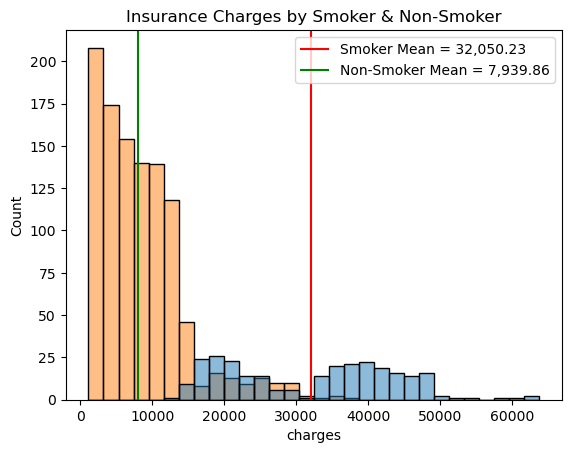

In [13]:
#calculate the statistical values
smoker_mean = smoker_insurance.mean()
nonsmoker_mean = nonsmoker_insurance.mean()

# base plot
ax = sns.histplot(data=df, x='charges', hue='smoker')

# Add a line for the mean (red) of smoker insurance charges
ax.axvline(smoker_mean, color = 'red',label=f'Smoker Mean = {smoker_mean:,.2f}')
# Add a line for the mean (green) of non-smoker insurance charges
ax.axvline(nonsmoker_mean, color = 'green', label = f'Non-Smoker Mean = {nonsmoker_mean:,.2f}')

# Add title to the plot
ax.set_title('Insurance Charges by Smoker & Non-Smoker')

# Add legend to the plot
ax.legend();

# Q2. Are men more likely to smoke than women?

## 1. State your Null Hypothesis and Alternative Hypothesis

**Null Hypothesis**: There is no difference in the likelihood of smoking between men and women.

**Alternative Hypothesis**: Sex influences the likelihood of smoking.

## 2. Select the correct test according to the data type and number of samples

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [15]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

**Test-Type**: Chi-Square test (Categorical Hypothesis Testing)

**Justifications**:

- The column of interest (target column) is 'smoker' (yes/no).
- We are comparing a binary target category: 'smoker' (yes/no) vs. categorical groups: 'sex' (female/male).


## 3. Test the assumptions of your selected test.

> Chi-Square test assumptions:
>
> - There are two categorical variables (ordinal or nominal)
> - The outcomes are independent.

### 3.1 Two categorical variables

1. 'smoker'
2. 'sex'

### 3.2 Outcomes are independent

Different participants are in each group (male vs female), so outcomes are independent.

## 4. Execute the selected test, or the alternative test (if you do not meet the assumptions)

### 4.1 Getting the Contingency Table with `pd.crosstab`


In [16]:
# calculate the contingency table with pd.cross-tab
table = pd.crosstab(df['sex'], df['smoker'])
table

smoker,no,yes
sex,,
female,547,115
male,517,159


In [17]:
# Run the Test and Save the Output
result = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = result #this labels the results

In [18]:
# Display p-value and check against alpha
print(p)
p<.05

0.006548143503580696


True

## 5. Interpret your p-value and reject or fail to reject your null hypothesis 

The p-value is less than 0.05, so we have a significant result.

Since the p-value < .05, we reject the null hypothesis that there is no relationship between sex and likelihood of being a smoker.

This means that we support the alternate hypothesis that men are more likely to smoke than women.

## 6. Show a supporting visualization that helps display the result

Text(0.5, 1.0, 'Smoker by sex')

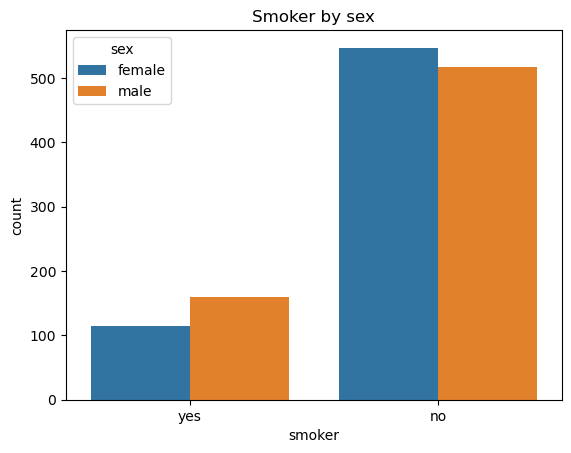

In [19]:

ax = sns.countplot(data=df, x='smoker', hue='sex')

# Add title to the plot
ax.set_title('Smoker by sex')


# Q3. Do different regions have different charges, on average?

## 1. State your Null Hypothesis and Alternative Hypothesis

**Null Hypothesis**: There are no difference in the charges across different regions.

**Alternate Hypothesis**: There are differences in the charges in different regions, on average.

## 2. Select the correct test according to the data type and number of samples

In [20]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

**Test Type**: One-Way ANOVA and/or Tukey (if assumptions are met.)

**Justifications**: 
- The target column is 'charges' which is numerical.
- We are comparing more than 2 groups (4 regions).

## 3. Test the assumptions of your selected test.

One Way ANOVA test assumptions: 
    
- No significant outliers
- Equal variance
- Normality

In [21]:
SE_charges = df.loc[df['region']=='southeast',"charges"]
SW_charges = df.loc[df['region']=='southwest',"charges"]
NW_charges = df.loc[df['region']=='northwest',"charges"]
NE_charges = df.loc[df['region']=='northeast',"charges"]
## Print the average charges for each group
print(f"For southeast region (n={len(SE_charges)}): Mean={np.mean(SE_charges):.2f}")
print(f"For southwest region (n={len(SW_charges)}): Mean={np.mean(SW_charges):.2f}")
print(f"For northwest region (n={len(NW_charges)}): Mean={np.mean(NW_charges):.2f}")
print(f"For northeast region (n={len(NE_charges)}): Mean={np.mean(NE_charges):.2f}")

For southeast region (n=364): Mean=14735.41
For southwest region (n=325): Mean=12346.94
For northwest region (n=325): Mean=12417.58
For northeast region (n=324): Mean=13406.38


### 3.1 Check Outliers

**southeast**

In [22]:
#check initial count before removing outliers
len(SE_charges)

364

In [23]:
#check for outliers in insurance charges in the southeast group
zscores_f = stats.zscore(SE_charges)
outliers_f = abs(zscores_f)>3
np.sum(outliers_f)

2

There are two outliers in the "southeast" region, so I will remove the outliers.

In [24]:
# remove outliers 
SE_charges = SE_charges[(np.abs(stats.zscore(SE_charges)) < 3)]

In [25]:
#check final count after removing outliers
len(SE_charges)

362

**southwest**

In [26]:
#check initial count before removing outliers
len(SW_charges)

325

In [27]:
#check for outliers in insurance charges in the southwest group
zscores_f = stats.zscore(SW_charges)
outliers_f = abs(zscores_f)>3
np.sum(outliers_f)

8

There are 8 outliers in the "southwest" region, so I will remove the outliers.

In [28]:
# remove outliers 
SW_charges = SW_charges[(np.abs(stats.zscore(SW_charges)) < 3)]

In [29]:
#check final count after removing outliers
len(SW_charges)

317

**northwest**

In [30]:
#check initial count before removing outliers
len(NW_charges)

325

In [31]:
#check for outliers in insurance charges in the southwest group
zscores_f = stats.zscore(NW_charges)
outliers_f = abs(zscores_f)>3
np.sum(outliers_f)

7

There are 7 outliers in the "northwest" region, so I will remove the outliers.

In [32]:
# remove outliers 
NW_charges = NW_charges[(np.abs(stats.zscore(NW_charges)) < 3)]

In [33]:
#check final count after removing outliers
len(NW_charges)

318

**northeast**

In [34]:
#check initial count before removing outliers
len(NE_charges)

324

In [35]:
#check for outliers in insurance charges in the southwest group
zscores_f = stats.zscore(NE_charges)
outliers_f = abs(zscores_f)>3
np.sum(outliers_f)

4

There are 4 outliers in the "northeast" region, so I will remove the outliers.

In [36]:
# remove outliers 
NE_charges = NE_charges[(np.abs(stats.zscore(NE_charges)) < 3)]

In [37]:
#check final count after removing outliers
len(NE_charges)

320

### 3.2 Test for Normality

Separate into groups

In [38]:
## Create groups dictionary. 
groups = {}
## Loop through all unique categories
for i in df['region'].unique():
    ## Get series for group and rename
    data = df.loc[df['region']==i,'charges'].copy()
    
    # save into the dictionary
    groups[i] = data
groups.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

In [39]:
## Run normal test on each group and confirming there are >15 in each group
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
southwest,325.0,6.125298e-23,102.294059
southeast,364.0,4.953297e-15,65.877446
northwest,325.0,5.184209e-24,107.232850
northeast,324.0,1.455431e-19,86.747629


In [40]:
### check significance
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df

,n,p,test stat,sig
southwest,325.0,6.125298e-23,102.294059,True
southeast,364.0,4.953297e-15,65.877446,True
northwest,325.0,5.184209e-24,107.232850,True
northeast,324.0,1.455431e-19,86.747629,True


These groups do not have normal distribution, but the sample size is greater than 15, so we can proceed.

### 3.3 Equal Variance

In [41]:
# with the * operator 
stats.levene(*groups.values())

LeveneResult(statistic=5.559966758410606, pvalue=0.0008610590250786703)

**Interpretation**: p-value is < 0.05, therefore, we do **not** have equal variance.

Therefore, we must select the **non-parametric equivalent** of the ONE-WAY ANOVA test, which is the **Kruskal-Wallis** test.

## 4. Execute the selected test, or the alternative test (if you do not meet the assumptions)

In [42]:
# perform the hypothesis test
result = stats.kruskal( *groups.values())
result

KruskalResult(statistic=4.734181215658743, pvalue=0.19232908072121002)

## 5.Interpret your p-value and reject or fail to reject your null hypothesis 

p-value is > 0.05, therefore, the test result did not show significance.

We fail to reject the null hypothesis and conclude that there are no significant difference in the average charges between the 4 regions.

## 6. Show a supporting visualization that helps display the result

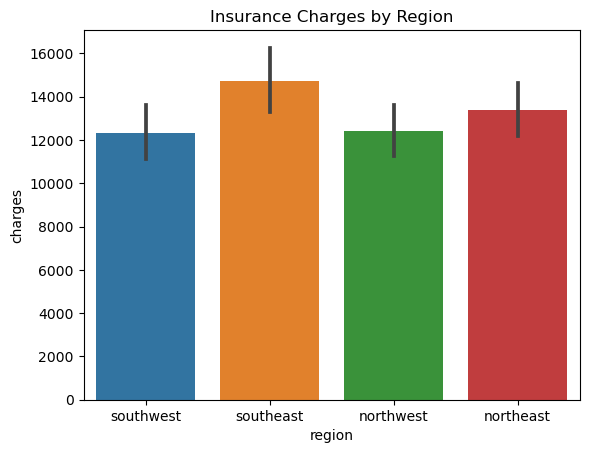

In [43]:

ax = sns.barplot(data=df, x='region', y='charges')

# Add title to the plot
ax.set_title('Insurance Charges by Region');
